In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math
from scipy.stats import distributions as dists 
from plotly.tools import FigureFactory as FF
import plotly.plotly as py

#Load data
payroll = pd.read_csv("processed_data.csv") 

c:\users\sweta\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (4,24,28) have mixed types. Specify dtype option on import or set low_memory=False.



In [95]:
#To remove the outlier
def outlier_range(x):
    x = np.array(x)
    upper_q = np.percentile(x, 75)
    lower_q = np.percentile(x, 25)
    iqr = (upper_q - lower_q) * 1.5
    #print("IQR:",iqr," lower:",lower_q," upper:",upper_q)
    acceptable_range = (lower_q - iqr, upper_q + iqr)
    return acceptable_range

In [96]:
def waldstest(payroll, year1, year2, attribute):
    z_critical = 1.96
    payroll_y1 = payroll[payroll.year ==year1]
    payroll_y2 = payroll[payroll.year ==year2]
    
    clean_y1 = payroll_y1[attribute].values
    index = []
    for i in range(len(clean_y1)):
        if clean_y1[i] < -45098.666250000002 and clean_y1[i] > 209266.00375:
            index.append(i)
    clean_y1 = np.delete(clean_y1,index)
    clean_y2 = payroll_y2[attribute].values
    index = []
    for i in range(len(clean_y2)):
        if clean_y2[i] < -45098.666250000002 and clean_y2[i] > 209266.00375:
            index.append(i)
    clean_y2 = np.delete(clean_y2,index)
    
    payroll_y1_pop_mean = clean_y1.mean() #Population Mean - True Mean

    payroll_y2_sample_mean = clean_y2.mean() #Sample Mean - [Theta_hat]
    payroll_y2_sample_std = statistics.stdev(clean_y2)
    
#     print(payroll_y1_pop_mean, payroll_y2_sample_mean,payroll_y2_sample_std)
    wald_statistic = (payroll_y2_sample_mean - payroll_y1_pop_mean)/payroll_y2_sample_std
    print("Wald's Statistic = ",wald_statistic)
    if abs(wald_statistic) >z_critical :
        print("Rejected")
    else:
        print("Accepted")
    
    
    #Plot graph
    payroll_y1.insert(0, 'ID', range(0, 0 + len(payroll_y1)))
    payroll_y2.insert(0, 'ID', range(0, 0 + len(payroll_y2)))
    plt.plot(payroll_y1['ID'], payroll_y1[attribute],label = year1)
    plt.plot(payroll_y2['ID'], payroll_y2[attribute],label = year2)
    plt.legend()
    plt.show()
    
    

Wald's Statistic =  0.0865295991877
Accepted


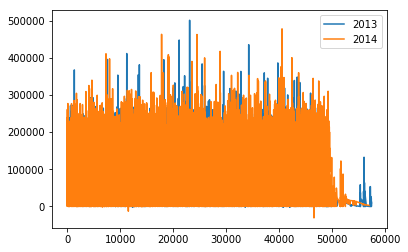

In [97]:
"""
Null Hypothesis : Total_Pay does not increase in 2014 as compared to 2013
Alternate Hypothesis: It increases
Technique : Wald's Test 
    True Mean : 2013
    Estimated Mean : 2014
"""
waldstest(payroll, 2013, 2014, 'total_payments')

Wald's Statistic =  -0.023373680541
Accepted


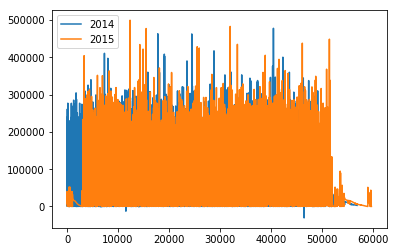

In [98]:
"""
Null Hypothesis : Total_Pay does not increase in 2015as compared to 2014
Alternate Hypothesis: It increases
Technique : Wald's Test 
    True Mean : 2014
    Estimated Mean : 2015
"""
waldstest(payroll, 2014, 2015, 'total_payments')

Wald's Statistic =  -1.96672933256
Rejected


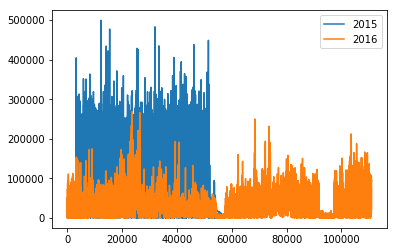

In [99]:
"""
Null Hypothesis : Total_Pay does not increase in 2015 as compared to 2016
Alternate Hypothesis: It increases
Technique : Wald's Test 
    True Mean : 2015
    Estimated Mean : 2016
"""
waldstest(payroll, 2015, 2016, 'total_payments')

Wald's Statistic =  0.0951187797163
Accepted


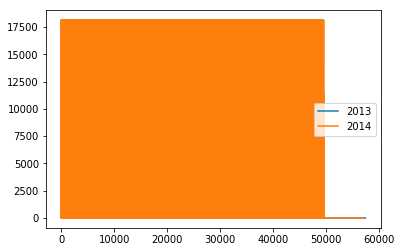

In [100]:
"""
Null Hypothesis : Aerage Benefit COst does not increase in 2014 as compared to 2013
Alternate Hypothesis: It increases
Technique : Wald's Test 
    True Mean : 2013
    Estimated Mean : 2014
"""
waldstest(payroll, 2013, 2014, 'average_benefit_cost')

Wald's Statistic =  -0.02262156973
Accepted


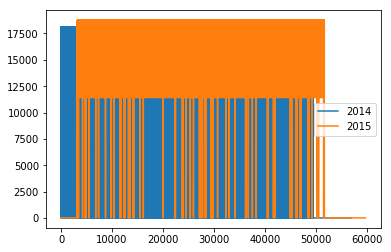

In [101]:
"""
Null Hypothesis : Aerage Benefit COst does not increase in 2015 as compared to 2014
Alternate Hypothesis: It increases
Technique : Wald's Test 
    True Mean : 2014
    Estimated Mean : 2015
"""
waldstest(payroll, 2014, 2015, 'average_benefit_cost')

Wald's Statistic =  0.138277414716
Accepted


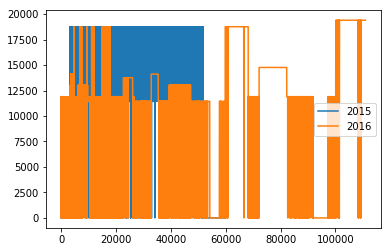

In [102]:
"""
Null Hypothesis : Aerage Benefit COst does not increase in 2016 as compared to 2015
Alternate Hypothesis: It increases
Technique : Wald's Test 
    True Mean : 2015
    Estimated Mean : 2016
"""
waldstest(payroll, 2015, 2016, 'average_benefit_cost')